Kelompok 3

Anggota  :

Aradea Haikal Ikhwan    - 2106636880

Amar Reza Al’as		      - 2106703304

Satwika Bintang Bahana 	- 2106728282

Fachryl Ardra Dharmawan	- 2106728553


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TANPA PCA

### Pre-processing dataset

In [ ]:
dataset=pd.read_csv('https://raw.githubusercontent.com/Bintang-Satwika/pemula/main/folder1/diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print("jumlah outcome = 1 sebanyak",dataset.query('Outcome ==1').shape[0])
print("jumlah outcome = 0 sebanyak",dataset.query('Outcome ==0').shape[0])

jumlah outcome = 1 sebanyak 268
jumlah outcome = 0 sebanyak 500


#### STANDRARISASI INPUT AGAR HASIL TIDAK INFINITE

In [ ]:
X= dataset.drop('Outcome', axis=1)
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_scaled = (X - mean) / std_dev
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [ ]:
# Outuput dataset adalah jumlah_kolom outcome
Y= dataset[['Outcome']]
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


### Function untuk Metric evaluasi dan training ML

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, accuracy_score, f1_score

# Membuat fungsi untuk mengevaluasi performa model
def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print('F1 score         : %.4f'%f1_score(y_test, prediction, average='binary'))
    print('Precision score  : %.4f'%precision_score(y_test, prediction, average='binary',zero_division=0))
    print('Recall score     : %.4f'%recall_score(y_test, prediction, average='binary',zero_division=0))
    print('Accuracy score   : %.4f'%accuracy_score(y_test, prediction))
    print()

In [ ]:
def inisiasi_awal(X_array, Y_array):
    X_array, Y_array=X_array.to_numpy(), Y_array.to_numpy()

    jumlah_baris, jumlah_kolom=X_array.shape[0], X_array.shape[1]
    W_array=np.random.randn(X_array.shape[1], 1) * 0.01 # weight
    b=0 # bias
    assert Y_array.shape == (jumlah_baris, 1), "Nah loh! shape Y tidak sesuai"
    assert W_array.shape == (jumlah_kolom, 1), "Hayo! shape W tidak sesuai"

    parameter={ "weight":[] , "bias":[], "cost":[] }
    return parameter, Y_array, X_array, W_array, b, jumlah_baris, jumlah_kolom


In [ ]:
def cost_function(A, Y):
    # menghitung cost function dan diferensial loss function terhadap weight
    loss    =    Y*np.log(A)+(1-Y)*(np.log(1-A))
    cost    = np.mean(-loss)
    return cost

def forward_propagation(X, W, b, Y):
    # menghitung persamaan linear dalam matrix
    z       = np.dot(X, W)+b
    assert z.shape[0] == Y.shape[0], "WARNING!! shape 'z' harus sama seperti Y"
    # mengubah menjadi persamaan non-linear menggunakan activation function: sigmoid
    A       =   np.divide(1, 1+np.exp(-z))
    assert A.shape[0] == Y.shape[0], "Hadehh! shape 'A' kok bisa salah"
    # menghitung cost (error) dari cost_function()
    cost    = cost_function(A, Y)
    return A, cost

def update_parameter(W,dw, b, db, learning_rate=0.01):
    # Update parameter weight dan bias
    W  = W- dw*learning_rate
    b  = b- db*learning_rate
    return W,b



### Numpy Scratch dengan jenis optimisasi batch (Vanilla) gradient descent

In [ ]:
parameter_vanilla, Y_vanilla, X_vanilla, W_vanilla,  b_vanilla, jumlah_baris, jumlah_kolom = \
    inisiasi_awal(X_scaled, Y)

iterasi=200
learning_rate=0.01
for i in range(iterasi):
     # menghitung regresi
    A, cost=forward_propagation(X_scaled,W_vanilla,b_vanilla, Y_vanilla)

    # menghitung gradient descent (back-propagation)
    dw      = (1/jumlah_baris)*np.dot((A-Y_vanilla).T, X_vanilla)
    dw      = dw.T # ditranspose
    db      =    np.squeeze((1/jumlah_baris)*np.sum(A-Y_vanilla))
    assert dw.shape == W_vanilla.shape, "gawat!!, ternyata shape dw gak sesuai W"
    assert np.shape(db) == np.shape(b_vanilla), "aduh!, shape db gak sesuai b"

    # update parameter
    W_vanilla, b_vanilla=update_parameter(W_vanilla, dw, b_vanilla , db)

    parameter_vanilla["weight"].append(np.squeeze(W_vanilla).tolist())
    parameter_vanilla["bias"].append(float(b_vanilla))
    parameter_vanilla["cost"].append(float(cost))

    # Print
    print("\niterasi ke-%d:"%(i+1))
    print("cost           = %f"%parameter_vanilla["cost"][i])


iterasi ke-1:
cost           = 0.690500

iterasi ke-2:
cost           = 0.689245

iterasi ke-3:
cost           = 0.687999

iterasi ke-4:
cost           = 0.686764

iterasi ke-5:
cost           = 0.685539

iterasi ke-6:
cost           = 0.684324

iterasi ke-7:
cost           = 0.683119

iterasi ke-8:
cost           = 0.681923

iterasi ke-9:
cost           = 0.680737

iterasi ke-10:
cost           = 0.679561

iterasi ke-11:
cost           = 0.678395

iterasi ke-12:
cost           = 0.677237

iterasi ke-13:
cost           = 0.676089

iterasi ke-14:
cost           = 0.674951

iterasi ke-15:
cost           = 0.673821

iterasi ke-16:
cost           = 0.672701

iterasi ke-17:
cost           = 0.671589

iterasi ke-18:
cost           = 0.670487

iterasi ke-19:
cost           = 0.669393

iterasi ke-20:
cost           = 0.668308

iterasi ke-21:
cost           = 0.667231

iterasi ke-22:
cost           = 0.666163

iterasi ke-23:
cost           = 0.665104

iterasi ke-24:
cost           = 0.664053



Hasil  numpy scratch yang diperoleh dari optimisasi Vanilla gradient descent

---



Text(0, 0.5, 'Nilai cost')

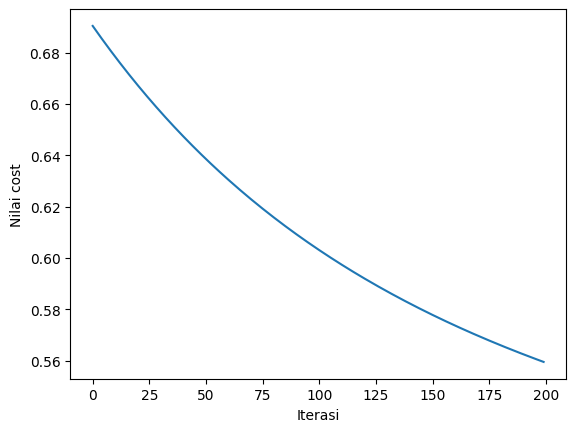

In [ ]:
plt.plot(np.arange(iterasi), parameter_vanilla["cost"])
plt.xlabel("Iterasi")
plt.ylabel("Nilai cost")

In [ ]:
min_index = np.array(parameter_vanilla["cost"]).argmin()
print("indeks dari array saat nilai cost paling kecil: ", min_index)
print("nilai cost: ", parameter_vanilla["cost"][min_index])
print("nilai bias: ", parameter_vanilla["bias"][min_index])
print("nilai wieght:\n", parameter_vanilla["weight"][min_index])

indeks dari array saat nilai cost paling kecil:  199
nilai cost:  0.5594465600335484
nilai bias:  -0.24023737603823256
nilai wieght:
 [0.13876075723283401, 0.31567262411832975, 0.0167224918679512, 0.02579462733327481, 0.05618007495548737, 0.208733785854152, 0.11673970506666807, 0.14515055046528139]


In [ ]:
# cost lebih rendah, maka hasil prediksi akan lebih baik secara teori.
h_pred=np.dot(X_vanilla, parameter_vanilla["weight"][min_index])+parameter_vanilla["bias"][min_index]
y_pred = 1/(1+np.exp(-h_pred))
class_pred = [0 if y_i<=0.5 else 1 for y_i in y_pred]

evaluate_classifier_performance(class_pred, Y['Outcome'])

Confusion Matrix



prediction,0,1
actual,,
0,412,88
1,100,168



F1 score         : 0.6412
Precision score  : 0.6562
Recall score     : 0.6269
Accuracy score   : 0.7552



### Numpy Scratch dengan  jenis optimisasi SGD (stochastic gradient descent)

In [ ]:
parameter_sgd, Y_sgd, X_sgd, W_sgd,  b_sgd, jumlah_baris, jumlah_kolom = \
    inisiasi_awal(X_scaled, Y)

iterasi=200
learning_rate=0.01
arange_index= np.arange(0,jumlah_baris)
iterasi=200

for i in range(iterasi):
    random_index = arange_index[i]
    xi=X_sgd[random_index]
    yi=Y_sgd[random_index]

    # menghitung regresi
    A, cost=forward_propagation(xi,W_sgd,b_sgd, yi)

    # menghitung gradient descent (back-propagation)
    dw      = xi.dot(np.squeeze(A-yi)).reshape(-1,1)
    db      =    np.squeeze(A-yi)
    assert dw.shape == W_sgd.shape, "gawat!!, ternyata shape dw gak sesuai W"
    assert np.shape(db) == np.shape(b_sgd), "aduhh!, shape db gak sesuai b"

    # update parameter
    W_sgd, b_sgd=update_parameter(W_sgd, dw, b_sgd , db)

    parameter_sgd["weight"].append(np.squeeze(W_sgd).tolist())
    parameter_sgd["bias"].append(float(b_sgd))
    parameter_sgd["cost"].append(float(cost))

    # Print
    print("\niterasi ke-%d:"%(i+1))
    print("cost           = %f"%parameter_sgd["cost"][i])


iterasi ke-1:
cost           = 0.690999

iterasi ke-2:
cost           = 0.684306

iterasi ke-3:
cost           = 0.665787

iterasi ke-4:
cost           = 0.669627

iterasi ke-5:
cost           = 0.671852

iterasi ke-6:
cost           = 0.673669

iterasi ke-7:
cost           = 0.731776

iterasi ke-8:
cost           = 0.699232

iterasi ke-9:
cost           = 0.628972

iterasi ke-10:
cost           = 0.714800

iterasi ke-11:
cost           = 0.649662

iterasi ke-12:
cost           = 0.677221

iterasi ke-13:
cost           = 0.806688

iterasi ke-14:
cost           = 0.532054

iterasi ke-15:
cost           = 0.598838

iterasi ke-16:
cost           = 0.751503

iterasi ke-17:
cost           = 0.662194

iterasi ke-18:
cost           = 0.745784

iterasi ke-19:
cost           = 0.687728

iterasi ke-20:
cost           = 0.687541

iterasi ke-21:
cost           = 0.762881

iterasi ke-22:
cost           = 0.673993

iterasi ke-23:
cost           = 0.650471

iterasi ke-24:
cost           = 0.696442



### Hasil  numpy scratch yang diperoleh dari optimisasi SGD (stochastic gradient descent)

Text(0, 0.5, 'Nilai cost ')

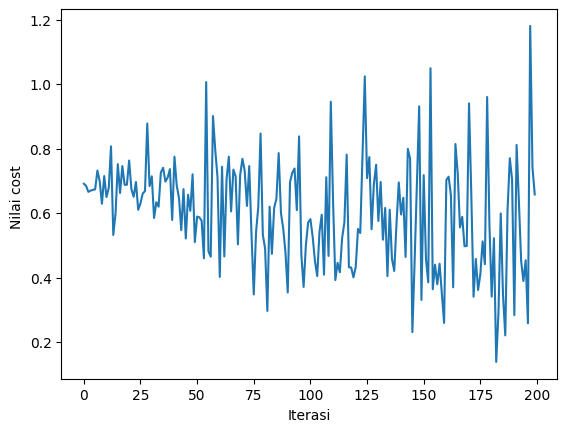

In [ ]:
plt.plot(np.arange(iterasi), parameter_sgd["cost"])
plt.xlabel("Iterasi")
plt.ylabel("Nilai cost ")

In [ ]:
min_index = np.array(parameter_sgd["cost"]).argmin()
print("indeks dari array saat nilai cost paling kecil: ", min_index)
print("nilai cost: ", parameter_sgd["cost"][min_index])
print("nilai bias: ", parameter_sgd["bias"][min_index])
print("nilai wieght:\n", parameter_sgd["weight"][min_index])

indeks dari array saat nilai cost paling kecil:  182
nilai cost:  0.13855366439281486
nilai bias:  -0.22110669078331116
nilai wieght:
 [0.13613180737815628, 0.31078294350573027, 0.061504226430166696, 0.017330544969329006, 0.1042172676227887, 0.21149363042597016, 0.12544907065517055, 0.19254229238951337]


In [ ]:
# cost lebih rendah, maka hasil prediksi akan lebih baik secara teori.
h_pred=np.dot(X_sgd, parameter_sgd["weight"][min_index])+parameter_sgd["bias"][min_index]
y_pred = 1/(1+np.exp(-h_pred))
class_pred = [0 if y_i<=0.5 else 1 for y_i in y_pred]

evaluate_classifier_performance(class_pred, Y['Outcome'])

Confusion Matrix



prediction,0,1
actual,,
0,402,98
1,97,171



F1 score         : 0.6369
Precision score  : 0.6357
Recall score     : 0.6381
Accuracy score   : 0.7461



### Menggunakan RSKF untuk split train dan test dengan jenis optimisasi SGD (stochastic gradient descent)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
#n_splits = jumlah eksperimen sebanyak n kali. maka jumlah dataset untuk testing 1/n dan untuk training (n-1)/n.
#n_repeteas = setiap eksperimen di ulangi sebanyak n kali
# random_state = urutan baris atau sampel dataset konstan (tidak ngacak)
f1_fold=[]
prediksi_fold=[]
y_test_fold=[]
rskf = RepeatedStratifiedKFold(n_splits=6, n_repeats=2, random_state=1)

for fold, (train_index, test_index) in enumerate(rskf.split(X_scaled, Y)):
    print(f"Fold {fold+1}:")
    print(f"Jumlah sampel Train       : {len(train_index)}")
    print(f"Jumlah sampel Test        : {len(test_index)}")
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]


    parameter_sgd, Y_sgd, X_sgd, W_sgd, b_sgd, jumlah_baris, jumlah_kolom = inisiasi_awal(X_train, y_train)
    learning_rate=0.01
    arange_index= np.arange(0,jumlah_baris)
    iterasi=200
    for i in range(iterasi):
        random_index = arange_index[i]
        xi=X_sgd[random_index]
        yi=Y_sgd[random_index]

        # menghitung regresi
        A, cost=forward_propagation(xi,W_sgd,b_sgd, yi)

        # menghitung gradient descent (back-propagation)
        dw      = xi.dot(np.squeeze(A-yi)).reshape(-1,1)
        db      =    np.squeeze(A-yi)
        assert dw.shape == W_sgd.shape, "gawat!!, ternyata shape dw gak sesuai W"
        assert np.shape(db) == np.shape(b_sgd), "aduhh!, shape db gak sesuai b"

        # update parameter
        W_sgd, b_sgd=update_parameter(W_sgd, dw, b_sgd , db)


    prediksi, _ = forward_propagation(X_test,W_sgd,b_sgd, y_test)
    class_pred = [0 if y_fold<=0.5 else 1 for y_fold in prediksi]

    nilai_f1 =f1_score(y_test, class_pred, average='binary')
    print('F1 score                  : %.4f\n'%nilai_f1)
    f1_fold.append(nilai_f1)
    prediksi_fold.append(class_pred)
    y_test_fold.append(y_test.values.ravel())

Fold 1:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.5870

Fold 2:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6458

Fold 3:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6809

Fold 4:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6667

Fold 5:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6374

Fold 6:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6207

Fold 7:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6327

Fold 8:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6292

Fold 9:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6506

Fold 10:
Jumlah sampel Train

In [ ]:
index_f1_tertinggi=np.argmax(f1_fold)
print(f"\nTertinggi ketika Fold ke-{index_f1_tertinggi+1}:")
evaluate_classifier_performance(prediksi_fold[index_f1_tertinggi], y_test_fold[index_f1_tertinggi])


Tertinggi ketika Fold ke-3:
Confusion Matrix



prediction,0,1
actual,,
0,66,17
1,13,32



F1 score         : 0.6809
Precision score  : 0.6531
Recall score     : 0.7111
Accuracy score   : 0.7656



# MENGGUNAKAN PCA

### Pre-processing dataset

In [ ]:
dataset=pd.read_csv('https://raw.githubusercontent.com/Bintang-Satwika/pemula/main/folder1/diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print("jumlah outcome = 1 sebanyak",dataset.query('Outcome ==1').shape[0])
print("jumlah outcome = 0 sebanyak",dataset.query('Outcome ==0').shape[0])

jumlah outcome = 1 sebanyak 268
jumlah outcome = 0 sebanyak 500


#### STANDRARISASI INPUT AGAR HASIL TIDAK INFINITE

In [ ]:
X= dataset.drop('Outcome', axis=1)
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_scaled = (X - mean) / std_dev
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


#### REDUKSI DIMENSI DENGAN PCA

In [ ]:
def PCA_komputasi(X_scaled):
    covariance_matrix = np.cov(X_scaled, rowvar=False)
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

    # sorting nilai eigen values dan eigen values dari tinggi ke rendah
    tinggi_ke_rendah = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[tinggi_ke_rendah]
    eigen_vectors = eigen_vectors[ : , tinggi_ke_rendah]

    #explained_variances dari principal component
    explained_variances =np.array(eigen_values / np.sum(eigen_values) * 100)

    return eigen_values, eigen_vectors, explained_variances

In [ ]:
eigen_values, eigen_vectors, explained_variances= PCA_komputasi(X_scaled)
print("Individu explained variances (%):\n", explained_variances)
print("\n")
print("Kumulatif explained variances (%):\n",np.cumsum(explained_variances))

Individu explained variances (%):
 [26.17974932 21.64012676 12.87037336 10.94411305  9.52930482  8.53285485
  5.24770225  5.0557756 ]


Kumulatif explained variances (%):
 [ 26.17974932  47.81987607  60.69024944  71.63436249  81.16366731
  89.69652215  94.9442244  100.        ]


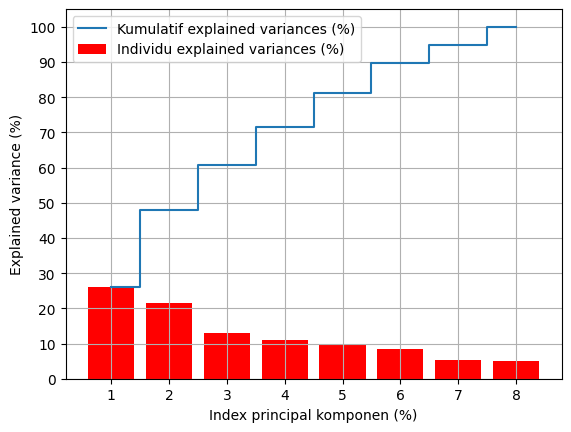

In [ ]:
sumbu_y=np.cumsum(explained_variances)
sumbu_x = np.arange(1, len(sumbu_y)+1)
plt.step(y=sumbu_y, x=sumbu_x, where='mid')
plt.bar(height=explained_variances, x=sumbu_x,color='red')
plt.xlabel("Index principal komponen (%)")
plt.ylabel("Explained variance (%)")
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend(["Kumulatif explained variances (%)", "Individu explained variances (%)"])
plt.show()

In [ ]:
# Misal,  jumlah principal komponen  yang dipakai sebanyak "5" (sudah mencakup 81.163 % variance yang bisa dijelaskan)
jumlah_komponen=5
X_pca=np.matmul(X_scaled, eigen_vectors[:, :jumlah_komponen])
X_pca

,0,1,2,3,4
0,-1.068503,-1.234895,-0.095930,-0.496990,0.109985
1,1.121683,0.733852,0.712938,-0.285056,0.389507
2,0.396477,-1.595876,-1.760678,0.070395,-0.906474
3,1.115781,1.271241,0.663729,0.579123,0.356060
4,-2.359334,2.184819,-2.963107,-4.033099,-0.592684
...,...,...,...,...,...
763,-1.562085,-1.923150,0.867408,0.390926,2.541527
764,0.100405,0.614181,0.764353,0.134859,-0.499290
765,0.283475,-0.097065,0.077192,0.687561,0.523009
766,1.060324,-0.837062,-0.425030,0.204493,-0.957593


In [ ]:
# Outuput dataset adalah jumlah_kolom outcome
Y= dataset[['Outcome']]
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


### Function untuk Metric evaluasi dan training ML

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, accuracy_score, f1_score

# Membuat fungsi untuk mengevaluasi performa model
def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print('F1 score         : %.4f'%f1_score(y_test, prediction, average='binary'))
    print('Precision score  : %.4f'%precision_score(y_test, prediction, average='binary',zero_division=0))
    print('Recall score     : %.4f'%recall_score(y_test, prediction, average='binary',zero_division=0))
    print('Accuracy score   : %.4f'%accuracy_score(y_test, prediction))
    print()

In [ ]:
def inisiasi_awal(X_array, Y_array):
    X_array, Y_array=X_array.to_numpy(), Y_array.to_numpy()

    jumlah_baris, jumlah_kolom=X_array.shape[0], X_array.shape[1]

    W_array=np.random.randn(X_array.shape[1], 1) * 0.01 # weight
    b=0 # bias
    assert Y_array.shape == (jumlah_baris, 1), "Nah loh! shape Y tidak sesuai"
    assert W_array.shape == (jumlah_kolom, 1), "Hayo! shape W tidak sesuai"

    parameter={ "weight":[] , "bias":[], "cost":[] }
    return parameter, Y_array, X_array, W_array, b, jumlah_baris, jumlah_kolom


In [ ]:
def cost_function(A, Y):
    # menghitung cost function dan diferensial loss function terhadap weight
    loss    =    Y*np.log(A)+(1-Y)*(np.log(1-A))
    cost    = np.mean(-loss)
    return cost

def forward_propagation(X, W, b, Y):
    # menghitung persamaan linear dalam matrix
    z       = np.dot(X, W)+b
    assert z.shape[0] == Y.shape[0], "WARNING!! shape 'z' harus sama seperti Y"
    # mengubah menjadi persamaan non-linear menggunakan activation function: sigmoid
    A       =   np.divide(1, 1+np.exp(-z))
    assert A.shape[0] == Y.shape[0], "Hadehh! shape 'A' kok bisa salah"
    # menghitung cost (error) dari cost_function()
    cost    = cost_function(A, Y)
    return A, cost

def update_parameter(W,dw, b, db, learning_rate=0.01):
    # Update parameter weight dan bias
    W  = W- dw*learning_rate
    b  = b- db*learning_rate
    return W,b



### Numpy Scratch dengan jenis optimisasi batch (Vanilla) gradient descent

In [ ]:
parameter_vanilla, Y_vanilla, X_vanilla, W_vanilla,  b_vanilla, jumlah_baris, jumlah_kolom = \
    inisiasi_awal(X_pca, Y)

iterasi=200
learning_rate=0.01
for i in range(iterasi):
     # menghitung regresi
    A, cost=forward_propagation(X_pca,W_vanilla,b_vanilla, Y_vanilla)

    # menghitung gradient descent (back-propagation)
    dw      = (1/jumlah_baris)*np.dot((A-Y_vanilla).T, X_vanilla)
    dw      = dw.T # ditranspose
    db      =    np.squeeze((1/jumlah_baris)*np.sum(A-Y_vanilla))
    assert dw.shape == W_vanilla.shape, "gawat!!, ternyata shape dw gak sesuai W"
    assert np.shape(db) == np.shape(b_vanilla), "aduh!, shape db gak sesuai b"

    # update parameter
    W_vanilla, b_vanilla=update_parameter(W_vanilla, dw, b_vanilla , db)

    parameter_vanilla["weight"].append(np.squeeze(W_vanilla).tolist())
    parameter_vanilla["bias"].append(float(b_vanilla))
    parameter_vanilla["cost"].append(float(cost))

    # Print
    print("\niterasi ke-%d:"%(i+1))
    print("cost           = %f"%parameter_vanilla["cost"][i])


iterasi ke-1:
cost           = 0.689205

iterasi ke-2:
cost           = 0.688053

iterasi ke-3:
cost           = 0.686911

iterasi ke-4:
cost           = 0.685778

iterasi ke-5:
cost           = 0.684656

iterasi ke-6:
cost           = 0.683542

iterasi ke-7:
cost           = 0.682438

iterasi ke-8:
cost           = 0.681344

iterasi ke-9:
cost           = 0.680259

iterasi ke-10:
cost           = 0.679182

iterasi ke-11:
cost           = 0.678115

iterasi ke-12:
cost           = 0.677057

iterasi ke-13:
cost           = 0.676008

iterasi ke-14:
cost           = 0.674968

iterasi ke-15:
cost           = 0.673936

iterasi ke-16:
cost           = 0.672913

iterasi ke-17:
cost           = 0.671899

iterasi ke-18:
cost           = 0.670893

iterasi ke-19:
cost           = 0.669896

iterasi ke-20:
cost           = 0.668907

iterasi ke-21:
cost           = 0.667926

iterasi ke-22:
cost           = 0.666953

iterasi ke-23:
cost           = 0.665988

iterasi ke-24:
cost           = 0.665032



### Hasil  numpy scratch yang diperoleh dari optimisasi Vanilla gradient descent

---



Text(0, 0.5, 'Nilai cost')

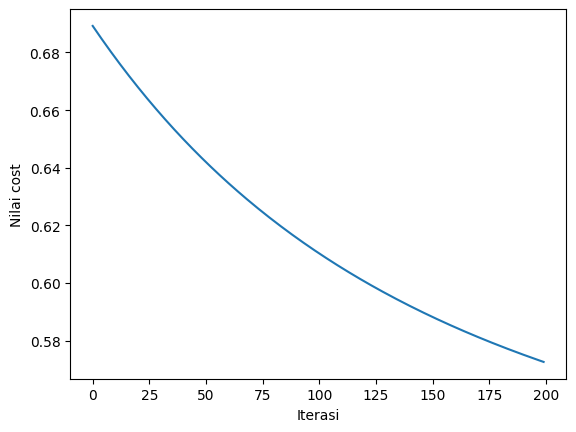

In [ ]:
plt.plot(np.arange(iterasi), parameter_vanilla["cost"])
plt.xlabel("Iterasi")
plt.ylabel("Nilai cost")

In [ ]:
min_index = np.array(parameter_vanilla["cost"]).argmin()
print("indeks dari array saat nilai cost paling kecil: ", min_index)
print("nilai cost: ", parameter_vanilla["cost"][min_index])
print("nilai bias: ", parameter_vanilla["bias"][min_index])
print("nilai wieght:\n", parameter_vanilla["weight"][min_index])

indeks dari array saat nilai cost paling kecil:  199
nilai cost:  0.5726665989659191
nilai bias:  -0.23992661859643785
nilai wieght:
 [-0.3406199751939418, -0.17001290752597953, -0.14601429824791182, 0.020448853607739424, -0.09279081004042386]


In [ ]:
# cost lebih rendah, maka hasil prediksi akan lebih baik secara teori.
h_pred=np.dot(X_vanilla, parameter_vanilla["weight"][min_index])+parameter_vanilla["bias"][min_index]
y_pred = 1/(1+np.exp(-h_pred))
class_pred = [0 if y_i<=0.5 else 1 for y_i in y_pred]

evaluate_classifier_performance(class_pred, Y['Outcome'])

Confusion Matrix



prediction,0,1
actual,,
0,410,90
1,106,162



F1 score         : 0.6231
Precision score  : 0.6429
Recall score     : 0.6045
Accuracy score   : 0.7448



### Numpy Scratch dengan  jenis optimisasi SGD (stochastic gradient descent)

In [ ]:
parameter_sgd, Y_sgd, X_sgd, W_sgd,  b_sgd, jumlah_baris, jumlah_kolom = \
    inisiasi_awal(X_pca, Y)

iterasi=200
learning_rate=0.01
arange_index= np.arange(0,jumlah_baris)
iterasi=200

for i in range(iterasi):
    random_index = arange_index[i]
    xi=X_sgd[random_index]
    yi=Y_sgd[random_index]

    # menghitung regresi
    A, cost=forward_propagation(xi,W_sgd,b_sgd, yi)

    # menghitung gradient descent (back-propagation)
    dw      = xi.dot(np.squeeze(A-yi)).reshape(-1,1)
    db      =    np.squeeze(A-yi)
    assert dw.shape == W_sgd.shape, "gawat!!, ternyata shape dw gak sesuai W"
    assert np.shape(db) == np.shape(b_sgd), "aduhh!, shape db gak sesuai b"

    # update parameter
    W_sgd, b_sgd=update_parameter(W_sgd, dw, b_sgd , db)

    parameter_sgd["weight"].append(np.squeeze(W_sgd).tolist())
    parameter_sgd["bias"].append(float(b_sgd))
    parameter_sgd["cost"].append(float(cost))

    # Print
    print("\niterasi ke-%d:"%(i+1))
    print("cost           = %f"%parameter_sgd["cost"][i])


iterasi ke-1:
cost           = 0.686948

iterasi ke-2:
cost           = 0.689988

iterasi ke-3:
cost           = 0.684523

iterasi ke-4:
cost           = 0.670504

iterasi ke-5:
cost           = 0.684490

iterasi ke-6:
cost           = 0.677940

iterasi ke-7:
cost           = 0.730666

iterasi ke-8:
cost           = 0.676549

iterasi ke-9:
cost           = 0.658241

iterasi ke-10:
cost           = 0.726756

iterasi ke-11:
cost           = 0.668931

iterasi ke-12:
cost           = 0.658913

iterasi ke-13:
cost           = 0.812983

iterasi ke-14:
cost           = 0.555281

iterasi ke-15:
cost           = 0.617504

iterasi ke-16:
cost           = 0.716749

iterasi ke-17:
cost           = 0.665248

iterasi ke-18:
cost           = 0.729549

iterasi ke-19:
cost           = 0.696123

iterasi ke-20:
cost           = 0.689476

iterasi ke-21:
cost           = 0.753174

iterasi ke-22:
cost           = 0.697136

iterasi ke-23:
cost           = 0.643328

iterasi ke-24:
cost           = 0.696659



### Hasil  numpy scratch yang diperoleh dari optimisasi SGD (stochastic gradient descent)

Text(0, 0.5, 'Nilai cost ')

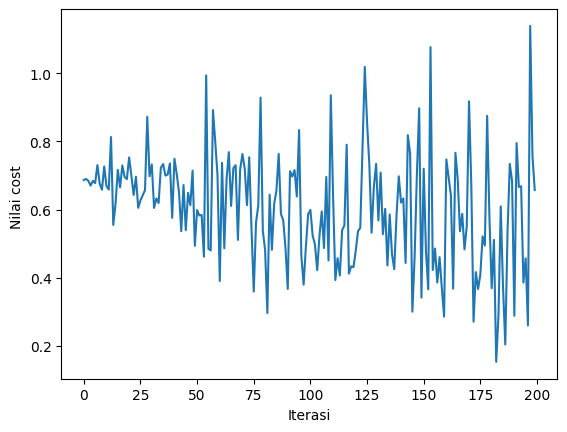

In [ ]:
plt.plot(np.arange(iterasi), parameter_sgd["cost"])
plt.xlabel("Iterasi")
plt.ylabel("Nilai cost ")

In [ ]:
min_index = np.array(parameter_sgd["cost"]).argmin()
print("indeks dari array saat nilai cost paling kecil: ", min_index)
print("nilai cost: ", parameter_sgd["cost"][min_index])
print("nilai bias: ", parameter_sgd["bias"][min_index])
print("nilai wieght:\n", parameter_sgd["weight"][min_index])

indeks dari array saat nilai cost paling kecil:  182
nilai cost:  0.15363273384054976
nilai bias:  -0.22052934736424723
nilai wieght:
 [-0.3874148847876988, -0.20160525710412486, -0.12087128519008591, 0.010927169773956885, -0.10081933276573814]


In [ ]:
# cost lebih rendah, maka hasil prediksi akan lebih baik secara teori.
h_pred=np.dot(X_sgd, parameter_sgd["weight"][min_index])+parameter_sgd["bias"][min_index]
y_pred = 1/(1+np.exp(-h_pred))
class_pred = [0 if y_i<=0.5 else 1 for y_i in y_pred]

evaluate_classifier_performance(class_pred, Y['Outcome'])

Confusion Matrix



prediction,0,1
actual,,
0,398,102
1,96,172



F1 score         : 0.6347
Precision score  : 0.6277
Recall score     : 0.6418
Accuracy score   : 0.7422



### Menggunakan RSKF untuk split train dan test dengan jenis optimisasi SGD (stochastic gradient descent)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
#n_splits = jumlah eksperimen sebanyak n kali. maka jumlah dataset untuk testing 1/n dan untuk training (n-1)/n.
#n_repeteas = setiap eksperimen di ulangi sebanyak n kali
# random_state = urutan baris atau sampel dataset konstan (tidak ngacak)
f1_fold=[]
prediksi_fold=[]
y_test_fold=[]
rskf = RepeatedStratifiedKFold(n_splits=6, n_repeats=2, random_state=1)

for fold, (train_index, test_index) in enumerate(rskf.split(X_pca, Y)):
    print(f"Fold {fold+1}:")
    print(f"Jumlah sampel Train       : {len(train_index)}")
    print(f"Jumlah sampel Test        : {len(test_index)}")
    X_train, X_test = X_pca.iloc[train_index], X_pca.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]


    parameter_sgd, Y_sgd, X_sgd, W_sgd, b_sgd, jumlah_baris, jumlah_kolom = inisiasi_awal(X_train, y_train)
    learning_rate=0.01
    arange_index= np.arange(0,jumlah_baris)
    iterasi=200
    for i in range(iterasi):
        random_index = arange_index[i]
        xi=X_sgd[random_index]
        yi=Y_sgd[random_index]

        # menghitung regresi
        A, cost=forward_propagation(xi,W_sgd,b_sgd, yi)

        # menghitung gradient descent (back-propagation)
        dw      = xi.dot(np.squeeze(A-yi)).reshape(-1,1)
        db      =    np.squeeze(A-yi)
        assert dw.shape == W_sgd.shape, "gawat!!, ternyata shape dw gak sesuai W"
        assert np.shape(db) == np.shape(b_sgd), "aduhh!, shape db gak sesuai b"

        # update parameter
        W_sgd, b_sgd=update_parameter(W_sgd, dw, b_sgd , db)


    prediksi, _ = forward_propagation(X_test,W_sgd,b_sgd, y_test)
    class_pred = [0 if y_fold<=0.5 else 1 for y_fold in prediksi]

    nilai_f1 =f1_score(y_test, class_pred, average='binary')
    print('F1 score                  : %.4f\n'%nilai_f1)
    f1_fold.append(nilai_f1)
    prediksi_fold.append(class_pred)
    y_test_fold.append(y_test.values.ravel())

Fold 1:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6087

Fold 2:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6327

Fold 3:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6452

Fold 4:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6897

Fold 5:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6452

Fold 6:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.5682

Fold 7:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6735

Fold 8:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6444

Fold 9:
Jumlah sampel Train       : 640
Jumlah sampel Test        : 128
F1 score                  : 0.6118

Fold 10:
Jumlah sampel Train

In [ ]:
index_f1_tertinggi=np.argmax(f1_fold)
print(f"\nTertinggi ketika Fold ke-{index_f1_tertinggi+1}:")
evaluate_classifier_performance(prediksi_fold[index_f1_tertinggi], y_test_fold[index_f1_tertinggi])


Tertinggi ketika Fold ke-4:
Confusion Matrix



prediction,0,1
actual,,
0,71,12
1,15,30



F1 score         : 0.6897
Precision score  : 0.7143
Recall score     : 0.6667
Accuracy score   : 0.7891

